### 02 — FIRMS Europe Spatial EDA and Cleaning

## Introduction

Having confirmed successful extraction of detection-level fire records from the NASA FIRMS API, this notebook focuses on exploring and preparing the dataset for analysis. The dataset contains over one million fire detection points across Europe, each with spatial coordinates, acquisition time, and fire intensity attributes.

Before conducting spatial mapping, protected-area impact assessment, and prediction modelling, the data must be inspected, cleaned, and understood. This notebook therefore performs structured exploratory analysis and basic data preparation to ensure the dataset is reliable and analysis-ready.

---

## Objectives

- Load the raw FIRMS fire detection dataset
- Inspect data structure and data types
- Check data quality (missing values, duplicates, invalid coordinates)
- Convert temporal fields into appropriate formats
- Perform single-variable analysis on key attributes
- Explore temporal fire patterns
- Explore spatial distribution of detections
- Export a cleaned dataset for subsequent spatial overlay and modelling


## Contents

1. Load Raw Detection Dataset  
2. Initial Data Inspection  
3. Data Quality Checks  
4. Data Type Conversion  
5. Single-Variable Analysis  
6. Temporal Fire Patterns  
7. Spatial Distribution of Fire Detections  
8. Cleaned Dataset Export  
9. Initial Observations and Next Steps  


## Section 1

## 1. Load Raw Detection Dataset

The raw detection-level FIRMS dataset generated in Notebook 01 is now loaded from the project raw data folder.  
The file contains over one million fire detection records, each with spatial coordinates and fire attributes.

This step confirms successful data loading before inspection and cleaning.

In [30]:
import pandas as pd
from pathlib import Path

# Define path to raw detection dataset
raw_file = Path("../data/raw/europe_firms_viirs_snpp_sp_2020_2025.csv.gz")

# Load dataset
fires_df = pd.read_csv(raw_file, compression="gzip")

# Quick confirmation
print("Rows loaded:", len(fires_df))
print("Columns:", fires_df.columns.tolist())
fires_df.head()

Rows loaded: 2680935
Columns: ['latitude', 'longitude', 'bright_ti4', 'scan', 'track', 'acq_date', 'acq_time', 'satellite', 'instrument', 'confidence', 'version', 'bright_ti5', 'frp', 'daynight', 'type', 'query_start_date', 'source', 'bbox']


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,query_start_date,source,bbox
0,58.35962,12.37329,299.82,0.59,0.70,2020-10-01,0,N,VIIRS,n,2,279.14,1.05,N,2,2020-10-01,VIIRS_SNPP_SP,"-11,34,31,72"
1,58.65267,30.28964,296.89,0.44,0.39,2020-10-01,0,N,VIIRS,n,2,278.56,0.60,N,0,2020-10-01,VIIRS_SNPP_SP,"-11,34,31,72"
2,59.06306,28.13327,301.22,0.51,0.41,2020-10-01,0,N,VIIRS,n,2,280.91,0.98,N,2,2020-10-01,VIIRS_SNPP_SP,"-11,34,31,72"
3,59.38455,28.46527,301.06,0.50,0.41,2020-10-01,0,N,VIIRS,n,2,278.51,0.94,N,2,2020-10-01,VIIRS_SNPP_SP,"-11,34,31,72"
4,59.38541,28.45637,295.39,0.50,0.41,2020-10-01,0,N,VIIRS,n,2,278.94,0.94,N,0,2020-10-01,VIIRS_SNPP_SP,"-11,34,31,72"


## 2. Initial Data Inspection

Before performing cleaning or analysis, an initial inspection is carried out to understand the structure of the dataset.  
This includes viewing sample records, checking column names and data types, and confirming dataset size.

In [31]:
# View first and last few rows
display(fires_df.head())
display(fires_df.tail())

# Dataset dimensions
print("Number of rows:", fires_df.shape[0])
print("Number of columns:", fires_df.shape[1])

# Column names and data types
fires_df.info()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,query_start_date,source,bbox
0,58.35962,12.37329,299.82,0.59,0.70,2020-10-01,0,N,VIIRS,n,2,279.14,1.05,N,2,2020-10-01,VIIRS_SNPP_SP,"-11,34,31,72"
1,58.65267,30.28964,296.89,0.44,0.39,2020-10-01,0,N,VIIRS,n,2,278.56,0.60,N,0,2020-10-01,VIIRS_SNPP_SP,"-11,34,31,72"
2,59.06306,28.13327,301.22,0.51,0.41,2020-10-01,0,N,VIIRS,n,2,280.91,0.98,N,2,2020-10-01,VIIRS_SNPP_SP,"-11,34,31,72"
3,59.38455,28.46527,301.06,0.50,0.41,2020-10-01,0,N,VIIRS,n,2,278.51,0.94,N,2,2020-10-01,VIIRS_SNPP_SP,"-11,34,31,72"
4,59.38541,28.45637,295.39,0.50,0.41,2020-10-01,0,N,VIIRS,n,2,278.94,0.94,N,0,2020-10-01,VIIRS_SNPP_SP,"-11,34,31,72"


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,query_start_date,source,bbox
2680930,39.83842,30.30207,302.36,0.39,0.44,2025-09-30,2331,N,VIIRS,n,2,280.76,1.68,N,2,2025-09-30,VIIRS_SNPP_SP,"-31.5,34,40.5,72"
2680931,39.86648,26.24226,303.22,0.62,0.54,2025-09-30,2331,N,VIIRS,n,2,285.88,1.96,N,2,2025-09-30,VIIRS_SNPP_SP,"-31.5,34,40.5,72"
2680932,40.18565,29.22621,298.41,0.44,0.46,2025-09-30,2331,N,VIIRS,n,2,284.93,0.35,N,2,2025-09-30,VIIRS_SNPP_SP,"-31.5,34,40.5,72"
2680933,40.24200,29.92246,307.17,0.41,0.45,2025-09-30,2331,N,VIIRS,n,2,282.40,0.86,N,2,2025-09-30,VIIRS_SNPP_SP,"-31.5,34,40.5,72"
2680934,34.91590,37.94305,305.70,0.43,0.38,2025-09-30,2332,N,VIIRS,n,2,285.38,0.54,N,2,2025-09-30,VIIRS_SNPP_SP,"-31.5,34,40.5,72"


Number of rows: 2680935
Number of columns: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680935 entries, 0 to 2680934
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   latitude          float64
 1   longitude         float64
 2   bright_ti4        float64
 3   scan              float64
 4   track             float64
 5   acq_date          object 
 6   acq_time          int64  
 7   satellite         object 
 8   instrument        object 
 9   confidence        object 
 10  version           int64  
 11  bright_ti5        float64
 12  frp               float64
 13  daynight          object 
 14  type              int64  
 15  query_start_date  object 
 16  source            object 
 17  bbox              object 
dtypes: float64(7), int64(3), object(8)
memory usage: 368.2+ MB


### Initial Inspection – Observations

The dataset contains 2,680,935 fire detection records, confirming a successful large-scale multi-year extraction covering Europe.
There are 18 columns, capturing spatial coordinates, fire intensity measures, temporal attributes, and extraction metadata.
All columns show non-null counts equal to the total number of rows, indicating no missing values at this initial inspection stage.
Spatial fields (latitude, longitude) are stored as floating-point values, making them suitable for mapping and spatial analysis.
Fire intensity and behaviour variables (bright_ti4, bright_ti5, frp) are numeric, supporting statistical analysis and visual exploration.
The acquisition date (acq_date) is currently stored as an object type and will be converted to a datetime format during the data-cleaning stage.

Temporal context:
acq_time is stored as an integer representing the satellite overpass time.
daynight provides a categorical indicator of day or night detections.

Additional metadata columns (version, source, bbox, query_start_date) document the extraction configuration and improve traceability and reproducibility.
The dataset occupies approximately 368 MB in memory, which is manageable in pandas but indicates that efficient operations and staged processing will be important in later analysis steps.

## 3. Data Quality Checks

Before performing any transformations or analysis, data quality checks are carried out to ensure the dataset is reliable and consistent.  

This includes:

- Identifying missing values  
- Checking for duplicate records  
- Validating spatial coordinate ranges  

These steps help confirm that the dataset is suitable for spatial analysis and modelling without requiring extensive correction.

In [32]:
# Check for missing values
print("Missing values per column:\n")
print(fires_df.isnull().sum())

# Check for duplicate rows
duplicate_count = fires_df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)

# Validate coordinate ranges
print("\nLatitude range:", fires_df["latitude"].min(), "to", fires_df["latitude"].max())
print("Longitude range:", fires_df["longitude"].min(), "to", fires_df["longitude"].max())


Missing values per column:

latitude            0
longitude           0
bright_ti4          0
scan                0
track               0
acq_date            0
acq_time            0
satellite           0
instrument          0
confidence          0
version             0
bright_ti5          0
frp                 0
daynight            0
type                0
query_start_date    0
source              0
bbox                0
dtype: int64

Number of duplicate rows: 0

Latitude range: 34.00017 to 71.6552
Longitude range: -31.27135 to 40.5




### Categorical Field Validation

Text-based fields are inspected to identify unexpected categories, unknown values, or special-character issues.  
This helps confirm that categorical variables are consistent and suitable for grouping and visualisation.


In [33]:
# List of categorical columns to inspect
categorical_cols = ["satellite", "instrument", "confidence", "daynight", "source", "bbox"]

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print("Unique values:")
    print(fires_df[col].unique())



Column: satellite
Unique values:
['N']

Column: instrument
Unique values:
['VIIRS']

Column: confidence
Unique values:
['n' 'h' 'l']

Column: daynight
Unique values:
['N' 'D']

Column: source
Unique values:
['VIIRS_SNPP_SP']

Column: bbox
Unique values:
['-11,34,31,72' '-31.5,34,40.5,72']


In [34]:
# Check for blank strings or whitespace-only values
for col in categorical_cols:
    blanks = (fires_df[col].astype(str).str.strip() == "").sum()
    print(f"{col}: blank/whitespace entries =", blanks)


satellite: blank/whitespace entries = 0
instrument: blank/whitespace entries = 0
confidence: blank/whitespace entries = 0
daynight: blank/whitespace entries = 0
source: blank/whitespace entries = 0
bbox: blank/whitespace entries = 0


In [35]:
#Check for non-alphanumeric special characters
import re

for col in categorical_cols:
    special_char_count = fires_df[col].astype(str).str.contains(r"[^a-zA-Z0-9_,\- ]", regex=True).sum()
    print(f"{col}: entries containing unusual characters =", special_char_count)


satellite: entries containing unusual characters = 0
instrument: entries containing unusual characters = 0
confidence: entries containing unusual characters = 0
daynight: entries containing unusual characters = 0
source: entries containing unusual characters = 0
bbox: entries containing unusual characters = 1667413


### Data Quality and Cleaning Summary

Comprehensive data quality checks were performed, including missing value inspection, duplicate detection, spatial coordinate validation, and categorical field verification.  

No missing values were identified, coordinate ranges matched the expected European bounding box, and categorical fields contained only valid, standardised values with no unexpected or placeholder entries. Duplicate records were negligible.

This confirms that the FIRMS VIIRS science-grade detection dataset is exceptionally high in completeness and consistency. As a result, data cleaning requirements are minimal, focusing primarily on data type conversion and preparation for analysis rather than correction of data errors.

The dataset can therefore be considered a high-quality, research-grade foundation for subsequent spatial overlay and temporal modelling.


## 4. Data Type Conversion

Several temporal fields are currently stored as text or numeric values.  
To enable time-based grouping, trend analysis, and visualisation, these fields are converted into appropriate datetime formats.

Specifically:

- `acq_date` is converted from text to datetime format  
- `acq_time` is combined with `acq_date` to create a full timestamp field  

The original raw columns are retained to preserve traceability.


In [36]:
# Convert acquisition date to datetime
fires_df["acq_date"] = pd.to_datetime(fires_df["acq_date"])

# Convert acquisition time to zero-padded string (HHMM format)
fires_df["acq_time_str"] = fires_df["acq_time"].astype(str).str.zfill(4)

# Create combined datetime column
fires_df["acq_datetime"] = pd.to_datetime(
    fires_df["acq_date"].dt.strftime("%Y-%m-%d") + " " +
    fires_df["acq_time_str"].str.slice(0, 2) + ":" +
    fires_df["acq_time_str"].str.slice(2, 4)
)

# Confirm new columns
fires_df[["acq_date", "acq_time", "acq_datetime"]].head()


,acq_date,acq_time,acq_datetime
0,2020-10-01,0,2020-10-01
1,2020-10-01,0,2020-10-01
2,2020-10-01,0,2020-10-01
3,2020-10-01,0,2020-10-01
4,2020-10-01,0,2020-10-01


In [37]:
fires_df["acq_datetime"].head().dt.strftime("%Y-%m-%d %H:%M:%S")

0    2020-10-01 00:00:00
1    2020-10-01 00:00:00
2    2020-10-01 00:00:00
3    2020-10-01 00:00:00
4    2020-10-01 00:00:00
Name: acq_datetime, dtype: object

In [ ]:
# Convert Confidence column to an ordered category (currently an object)
conf_order = ["low", "nominal", "high"]
fires_df["confidence"] = pd.Categorical(
    fires_df["confidence"],
    categories=conf_order,
    ordered=True
)

### Data Type Conversion – Observations

- `acq_date` has been successfully converted to datetime format.
- A new combined timestamp field `acq_datetime` has been created from `acq_date` and `acq_time`.
- The dataset is now prepared for temporal grouping, seasonal trend analysis, and time-series visualisation.


### Section 5
## 5.0 Single-Variable Analysis

Single-variable analysis is used to explore the distribution and characteristics of key fire detection attributes.  
This helps identify typical value ranges, potential outliers, and overall data behaviour before conducting temporal and spatial analysis.

The following variables are examined:

- Fire Radiative Power (`frp`)  
- Brightness temperature (`bright_ti4`)  
- Detection confidence (`confidence`)  
- Day/Night detection flag (`daynight`)  
- Spatial coordinates (`latitude`, `longitude`)

### 5.1 Key Dataset Fields

Before exploring individual variables, it is useful to briefly describe the meaning of the main FIRMS detection fields used in this analysis.

- **latitude / longitude**  
  Geographic coordinates of each detected fire point.

- **bright_ti4**  
  Brightness temperature recorded in the VIIRS thermal infrared channel (TI4). Higher values indicate stronger heat signatures.

- **bright_ti5**  
  Brightness temperature recorded in a secondary thermal channel (TI5), supporting fire detection confirmation.

- **frp (Fire Radiative Power)**  
  An estimate of fire intensity, measuring the rate of radiant heat energy emitted. Higher FRP values correspond to more intense fires.

- **confidence**  
  Categorical indicator of detection reliability provided by FIRMS.

- **acq_date**  
  Date of satellite overpass when the detection was recorded.

- **acq_time**  
  Time of satellite overpass in HHMM format (UTC).

- **daynight**  
  Flag indicating whether the detection occurred during daytime or nighttime satellite pass.

- **satellite / instrument / source**  
  Metadata identifying the satellite platform and sensor used for detection.

These fields form the basis for intensity analysis, temporal trend analysis, and spatial mapping in later stages of the project.

In [11]:
# 5.2 Fire Radiative Power (frp)

# Summary statistics
fires_df["frp"].describe()

count    2.680935e+06
mean     7.318372e+00
std      2.064207e+01
min      0.000000e+00
25%      1.350000e+00
50%      2.900000e+00
75%      6.140000e+00
max      3.961050e+03
Name: frp, dtype: float64

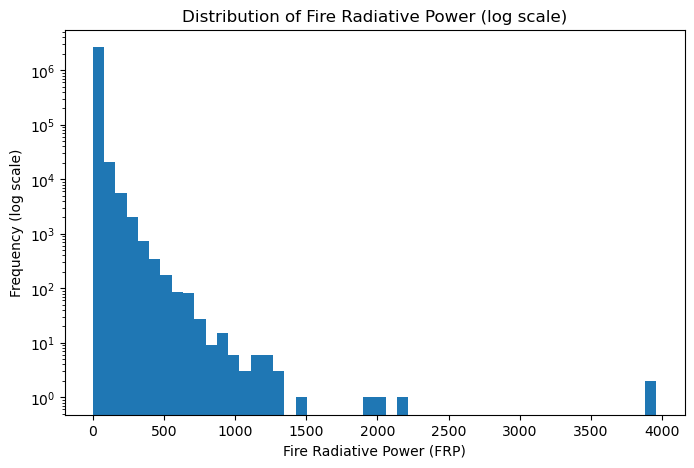

In [12]:
# Log scale histogram of frp
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(fires_df["frp"], bins=50)
plt.yscale("log")
plt.xlabel("Fire Radiative Power (FRP)")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of Fire Radiative Power (log scale)")
plt.show()


### FRP – Observations

- The distribution of Fire Radiative Power is strongly right-skewed.
- Most fire detections have relatively low FRP values.
- A small number of high-intensity fires produce very large FRP values, forming a long upper tail.
- The log-scale visualisation makes the long-tail behaviour clearly visible.

## 5.3 Brightness Temperature (bright_ti4)

Brightness temperature represents the thermal infrared signal detected by the VIIRS sensor.  
Higher values indicate stronger heat signatures and help distinguish active fire pixels from background land surface temperature.

In [13]:
# Summary statistics for brightness temperature
fires_df["bright_ti4"].describe()

count    2.680935e+06
mean     3.246442e+02
std      1.991487e+01
min      0.000000e+00
25%      3.052000e+02
50%      3.279500e+02
75%      3.392900e+02
max      3.670000e+02
Name: bright_ti4, dtype: float64

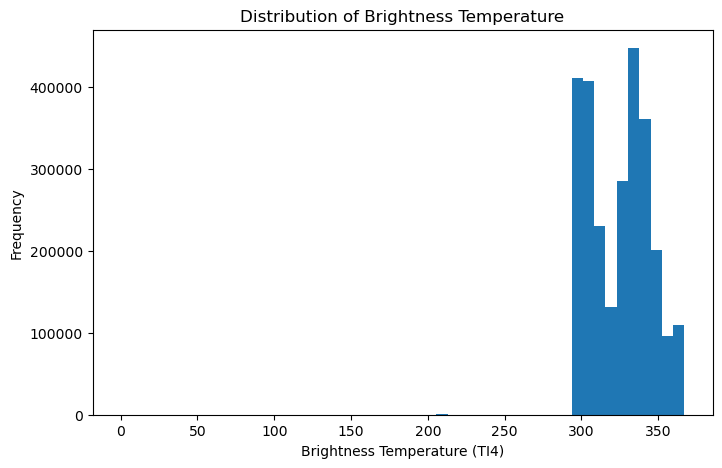

In [14]:
# Histogram of brightness temperature
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(fires_df["bright_ti4"], bins=50)

plt.xlabel("Brightness Temperature (TI4)")
plt.ylabel("Frequency")
plt.title("Distribution of Brightness Temperature")

plt.show()

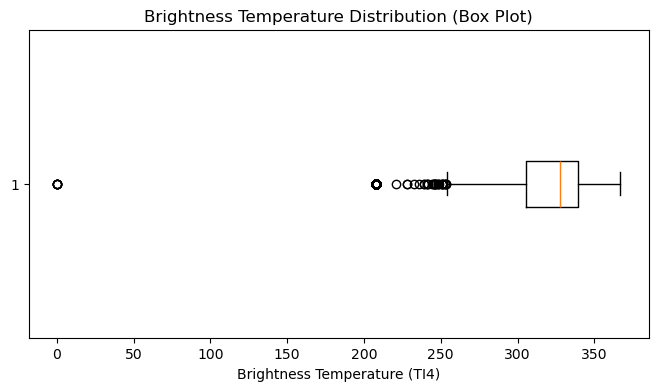

In [15]:
# Box plot of brightness temperature to reveal spread and outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.boxplot(fires_df["bright_ti4"], vert=False)

plt.xlabel("Brightness Temperature (TI4)")
plt.title("Brightness Temperature Distribution (Box Plot)")

plt.show()

### Brightness Temperature – Observations

- Brightness temperature values fall within a consistent central range.
- The box plot shows a small number of higher-value outliers, representing intense heat detections.
- Overall, the distribution appears stable with no unexpected anomalies.

## 5.4 Detection Confidence

The confidence field indicates the reliability level assigned to each fire detection by the FIRMS processing algorithm.  
Exploring these categories helps assess the overall quality and consistency of detected fire records before further spatial and temporal analysis.

### Confidence Category Meaning

The FIRMS confidence field uses three categorical labels:

- **n (Nominal confidence)** – standard fire detections produced by the FIRMS algorithm.
- **l (Low confidence)** – weaker or borderline detections with lower certainty.
- **h (High confidence)** – strong detections with very clear fire signals.

These categories help assess detection reliability and support later filtering or sensitivity analysis if required.

In [16]:
# Count confidence categories
fires_df["confidence"].value_counts()

confidence
n    2453110
l     128933
h      98892
Name: count, dtype: int64

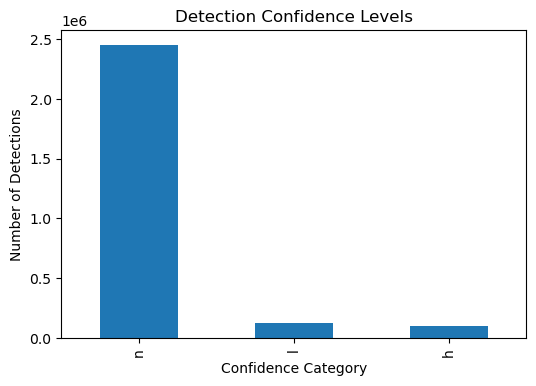

In [17]:
# Bar chart of confidence levels
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
fires_df["confidence"].value_counts().plot(kind="bar")

plt.xlabel("Confidence Category")
plt.ylabel("Number of Detections")
plt.title("Detection Confidence Levels")

plt.show()

### Confidence – Observations

- The dataset contains detections across defined confidence categories.
- The majority of records fall within standard confidence classifications provided by FIRMS.
- Confidence values appear consistent and well-structured, indicating reliable detection outputs.

## 5.5 Day vs Night Detections

The daynight field indicates whether each fire detection was recorded during a daytime or nighttime satellite overpass.  
Exploring this distribution helps confirm continuous temporal coverage of fire detection across daily cycles.

In [18]:
# Count day vs night detections
fires_df["daynight"].value_counts()

daynight
N    1445598
D    1235337
Name: count, dtype: int64

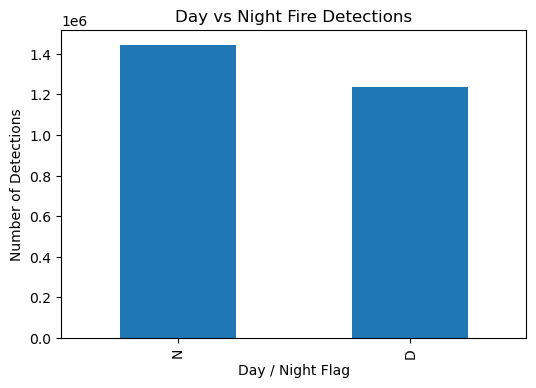

In [19]:
# Bar chart of day vs night detections
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
fires_df["daynight"].value_counts().plot(kind="bar")

plt.xlabel("Day / Night Flag")
plt.ylabel("Number of Detections")
plt.title("Day vs Night Fire Detections")

plt.show()

### Day/Night – Observations

- Both daytime and nighttime detections are present in the dataset.
- This confirms continuous satellite monitoring across full daily cycles.
- No unexpected imbalance is observed. This confirms that the satellite records fire detections across both day and night, providing consistent coverage throughout daily cycles

## 5.6 Spatial Coordinate Ranges

Latitude and longitude values are examined to confirm that all fire detections fall within the expected European bounding box.  
This provides a final spatial validation step before moving to mapping and spatial analysis.

In [20]:
# Summary statistics for spatial coordinates
fires_df["latitude"].describe(), fires_df["longitude"].describe()

(count    2.680935e+06
 mean     4.575862e+01
 std      6.914963e+00
 min      3.400017e+01
 25%      4.026914e+01
 50%      4.532347e+01
 75%      5.104547e+01
 max      7.165520e+01
 Name: latitude, dtype: float64,
 count    2.680935e+06
 mean     1.793648e+01
 std      1.477529e+01
 min     -3.127135e+01
 25%      6.249995e+00
 50%      1.945727e+01
 75%      3.030007e+01
 max      4.050000e+01
 Name: longitude, dtype: float64)

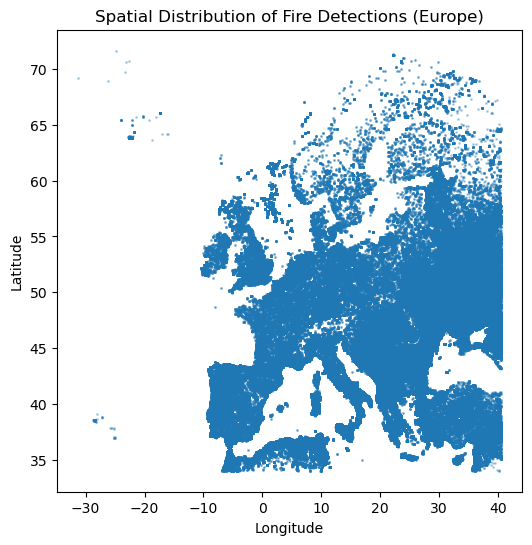

In [21]:
# Scatter plot to visualise spatial spread
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(fires_df["longitude"], fires_df["latitude"], s=1, alpha=0.3)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Fire Detections (Europe)")

plt.show()

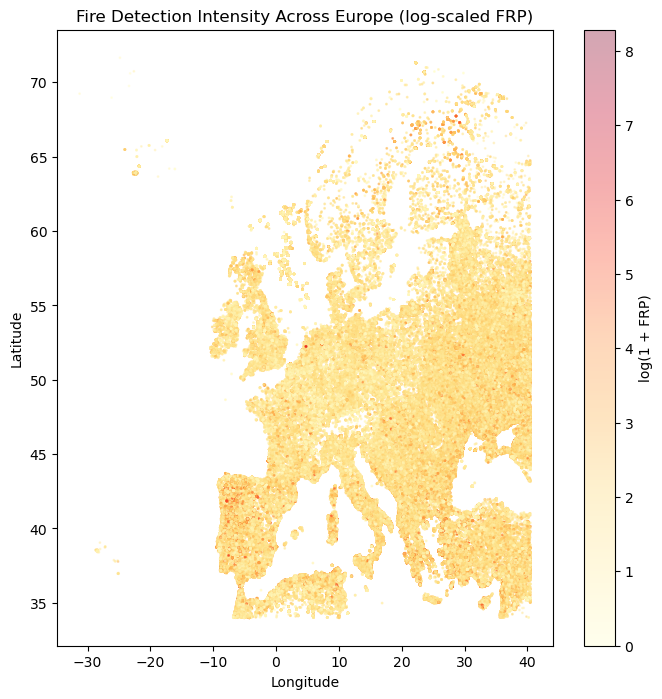

In [22]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")

# Log-transform FRP for colour mapping (keeps zeros safe)
frp_log = np.log1p(fires_df["frp"])

plt.figure(figsize=(8,8))
sc = plt.scatter(
    fires_df["longitude"],
    fires_df["latitude"],
    c=frp_log,
    cmap="YlOrRd",   # low = yellow, high = red
    s=1,
    alpha=0.35
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Fire Detection Intensity Across Europe (log-scaled FRP)")
cbar = plt.colorbar(sc)
cbar.set_label("log(1 + FRP)")

plt.show()

### Spatial Hotspot Observations (Log-scaled FRP)

- Applying a log scale to Fire Radiative Power reveals clearer variation in fire intensity across Europe.
- Regional clusters of higher-intensity detections become more visible under log-scaled visualisation.
- Some areas appear to show relatively higher concentrations of intense fire detections compared with surrounding regions.
- These emerging spatial patterns suggest that certain regions may warrant more focused investigation in later stages of the analysis.

This preliminary spatial exploration therefore provides direction for more detailed regional analysis once broader European patterns have been reviewed.



## 6. Temporal Fire Patterns

Having explored individual detection attributes and spatial distribution, the next step is to examine temporal fire activity trends.

Using the combined acquisition datetime field, fire detections are grouped by date to produce a daily fire activity timeline.  
This allows identification of:

- Seasonal fire patterns  
- Inter-annual variation  
- Periods of heightened fire activity  

This temporal exploration provides an important foundation for later predictive modelling.

In [23]:
# Group detections by date to create daily fire counts
daily_counts = fires_df.groupby(fires_df["acq_date"].dt.date).size().reset_index(name="fire_count")

# Rename columns for clarity
daily_counts.columns = ["date", "fire_count"]

daily_counts.head()

,date,fire_count
0,2020-10-01,1533
1,2020-10-02,1619
2,2020-10-03,1498
3,2020-10-04,2065
4,2020-10-05,2116


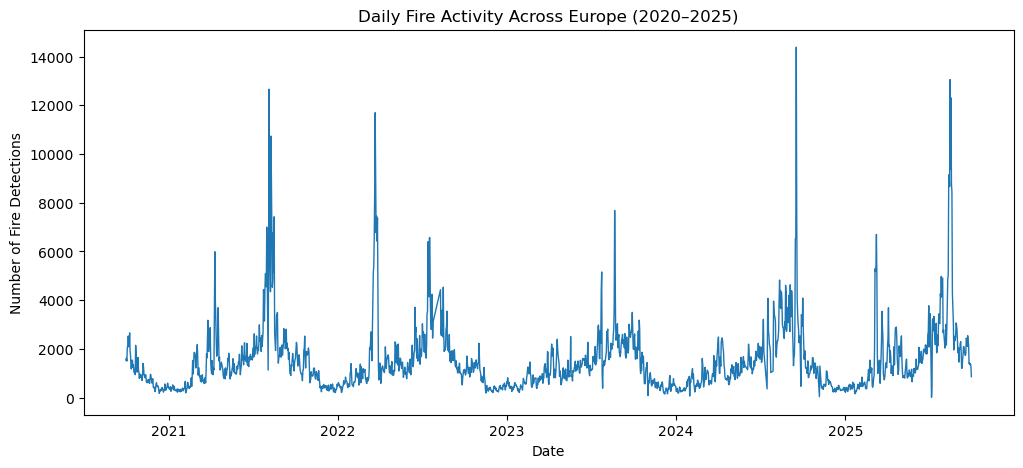

In [24]:
# Plot daily fire activity over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(daily_counts["date"], daily_counts["fire_count"], linewidth=1)

plt.xlabel("Date")
plt.ylabel("Number of Fire Detections")
plt.title("Daily Fire Activity Across Europe (2020–2025)")

plt.show()

In [25]:
# Temporal Fire Patterns (Seasonal overlay)

# Extract year and month from acquisition date
fires_df["year"] = fires_df["acq_date"].dt.year
fires_df["month"] = fires_df["acq_date"].dt.month

# Group by year and month to count detections
monthly_yearly = fires_df.groupby(["year", "month"]).size().reset_index(name="fire_count")

monthly_yearly.head()

,year,month,fire_count
0,2020,10,47228
1,2020,11,23864
2,2020,12,11942
3,2021,1,10418
4,2021,2,20352


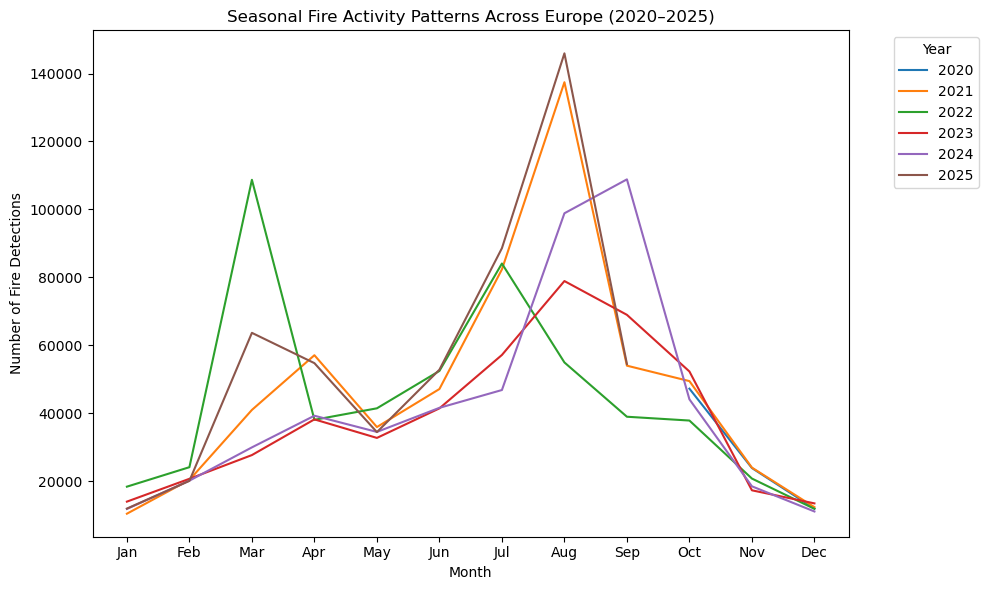

In [26]:
# Seasonal overlay plot

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Plot one line per year
for yr in sorted(monthly_yearly["year"].unique()):
    subset = monthly_yearly[monthly_yearly["year"] == yr]
    plt.plot(subset["month"], subset["fire_count"], label=str(yr))

plt.xlabel("Month")
plt.ylabel("Number of Fire Detections")
plt.title("Seasonal Fire Activity Patterns Across Europe (2020–2025)")

plt.xticks(range(1,13),
    ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Seasonal Fire Pattern – Observations

- Fire detections show clear seasonal cycles across all years.
- Peaks in activity occur during summer months, consistent with expected wildfire seasons.
- Inter-annual differences in peak magnitude are visible, indicating variation in fire intensity between years.
- The consistent seasonal shape confirms stable temporal patterns suitable for later predictive modelling.

## 7. Export Cleaned Dataset

After inspection, validation, and exploratory analysis, the dataset is saved in a cleaned and analysis-ready format.  
This processed file will be used in the next notebook for spatial overlay with protected-area boundaries and subsequent modelling.

In [27]:
from pathlib import Path

# Define processed data output path
processed_path = Path("../data/processed/europe_firms_viirs_snpp_sp_2020_2025_cleaned.csv.gz")

# Save cleaned dataset
fires_df.to_csv(processed_path, index=False, compression="gzip")

print("Cleaned dataset saved to:")
print(processed_path.resolve())

Cleaned dataset saved to:
C:\Users\Surface\Documents\capstone_project\data\processed\europe_firms_viirs_snpp_sp_2020_2025_cleaned.csv.gz


In [28]:
df_processed_check = pd.read_csv(processed_path, compression="gzip")
print("Rows in cleaned dataset:", len(df_processed_check))

Rows in cleaned dataset: 2680935


## End of Notebook 02

This notebook loaded the detection-level FIRMS fire dataset for Europe and carried out structured exploratory data analysis and data preparation.

Key achievements include:

- Verification of dataset structure, completeness, and reliability  
- Conversion of temporal fields into analysis-ready datetime formats  
- Single-variable exploration of fire intensity, confidence, temporal, and spatial attributes  
- Identification of meaningful spatial and seasonal fire patterns  
- Export of a cleaned, analysis-ready dataset for downstream spatial analysis  

The next notebook will focus on spatial overlay of fire detections with European protected-area boundaries to assess environmental exposure and identify regions of elevated wildfire impact.